In [14]:
# Import modules
import tensorflow as tf 
import matplotlib.pyplot as plt   

In [15]:
# Get current directory
import os 
print(f"Current directory: {os.getcwd()}")
curr_dir = os.getcwd()

Current directory: c:\Users\SURAPTO\Edunet_Foundation_Internship\Techsaksham\Potato_Leaf_Disease_Detection


In [16]:
# Training path
train_path = os.path.join(curr_dir, "dataset", "Train")
print(f"Training path: {train_path}")

Training path: c:\Users\SURAPTO\Edunet_Foundation_Internship\Techsaksham\Potato_Leaf_Disease_Detection\dataset\Train


In [17]:
# Validation path
valid_path = os.path.join(curr_dir, "dataset", "Valid")
print(f"Validation path: {valid_path}")

Validation path: c:\Users\SURAPTO\Edunet_Foundation_Internship\Techsaksham\Potato_Leaf_Disease_Detection\dataset\Valid


In [18]:
# Testing path
test_path = os.path.join(curr_dir, "dataset", "Test")
print(f"Validation path: {test_path}")

Validation path: c:\Users\SURAPTO\Edunet_Foundation_Internship\Techsaksham\Potato_Leaf_Disease_Detection\dataset\Test


In [19]:
# Load training dataset
train_set = tf.keras.utils.image_dataset_from_directory(
    train_path,
    labels='inferred',
    label_mode='categorical',
    color_mode='rgb',
    image_size=(128, 128),
    shuffle=True,
    interpolation='bilinear'
)

Found 900 files belonging to 3 classes.


In [20]:
# Class names in training dataset
train_set.class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [21]:
# Load validation dataset
valid_set = tf.keras.utils.image_dataset_from_directory(
    valid_path,
    labels='inferred',
    label_mode='categorical',
    color_mode='rgb',
    image_size=(128, 128),
    shuffle=True,
    interpolation='bilinear'
)

Found 300 files belonging to 3 classes.


In [22]:
# Class names in validation dataset
valid_set.class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [23]:
# Load testing dataset
test_set = tf.keras.utils.image_dataset_from_directory(
    test_path,
    labels='inferred',
    label_mode='categorical',
    color_mode='rgb',
    image_size=(128, 128),
    shuffle=True,
    interpolation='bilinear'
)

Found 300 files belonging to 3 classes.


In [24]:
# Class names in testing dataset
test_set.class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [25]:
# Generate the Convolutional Neural Network (CNN)
cnn = tf.keras.models.Sequential()

# First block
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[128, 128, 3]))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Second block
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Third block
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Fourth block
cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Fifth block
cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Remove 25% of the neurons
cnn.add(tf.keras.layers.Dropout(0.25))

# Reduces dimension of the image
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=1500, activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.4))

# Output
cnn.add(tf.keras.layers.Dense(units=3, activation='softmax'))

In [26]:
# Compile the CNN
cnn.compile(
    optimizer=tf.keras.optimizers.Adam(
        learning_rate=0.0001
    ),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [27]:
# Summary of the CNN
cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │         4,503 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,790,227 (29.72 MB)

 Trainable params: 7,790,227 (29.72 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
# Train the model
train_history = cnn.fit(x=train_set, validation_data=valid_set, epochs=10)

Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.3603 - loss: 1.9414 - val_accuracy: 0.5900 - val_loss: 0.7915
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.6803 - loss: 0.6906 - val_accuracy: 0.7367 - val_loss: 0.5228
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.7772 - loss: 0.4983 - val_accuracy: 0.8233 - val_loss: 0.3910
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.8405 - loss: 0.3799 - val_accuracy: 0.8167 - val_loss: 0.4159
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.8780 - loss: 0.2940 - val_accuracy: 0.8433 - val_loss: 0.3832
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.8761 - loss: 0.2987 - val_accuracy: 0.9000 - val_loss: 0.2197
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.9368 - loss: 0.1790 - val_accuracy: 0.9233 - val_loss: 0.1831
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.9405 - loss: 0.1400 - val_accuracy: 0.9100 - val_loss:

In [29]:
# Compute training loss and training accuracy
train_loss, train_acc = cnn.evaluate(train_set)
print(f"Training loss: {train_loss}")
print(f"Training accuracy: {train_acc}")

29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 253ms/step - accuracy: 0.9875 - loss: 0.0429
Training loss: 0.0390484482049942
Training accuracy: 0.9888888597488403


In [30]:
# Compute validation loss and validation accuracy
valid_loss, valid_acc = cnn.evaluate(valid_set)
print(f"Validation loss: {valid_loss}")
print(f"Validation accuracy: {valid_acc}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 227ms/step - accuracy: 0.9511 - loss: 0.1114
Validation loss: 0.11864383518695831
Validation accuracy: 0.9399999976158142


In [31]:
# Display training history
train_history.history

{'accuracy': [0.44555556774139404,
  0.6866666674613953,
  0.7811111211776733,
  0.8444444537162781,
  0.894444465637207,
  0.8722222447395325,
  0.9422222375869751,
  0.9477777481079102,
  0.9566666483879089,
  0.9644444584846497],
 'loss': [1.3171899318695068,
  0.677875816822052,
  0.4884055256843567,
  0.3709913194179535,
  0.25535261631011963,
  0.3029208779335022,
  0.17000988125801086,
  0.13888037204742432,
  0.13848555088043213,
  0.09240229427814484],
 'val_accuracy': [0.5899999737739563,
  0.7366666793823242,
  0.8233333230018616,
  0.8166666626930237,
  0.8433333039283752,
  0.8999999761581421,
  0.9233333468437195,
  0.9100000262260437,
  0.9133333563804626,
  0.9399999976158142],
 'val_loss': [0.7915149927139282,
  0.5227875113487244,
  0.390997052192688,
  0.4158867597579956,
  0.3832225203514099,
  0.21966560184955597,
  0.1830621212720871,
  0.23389388620853424,
  0.24380697309970856,
  0.11864383518695831]}

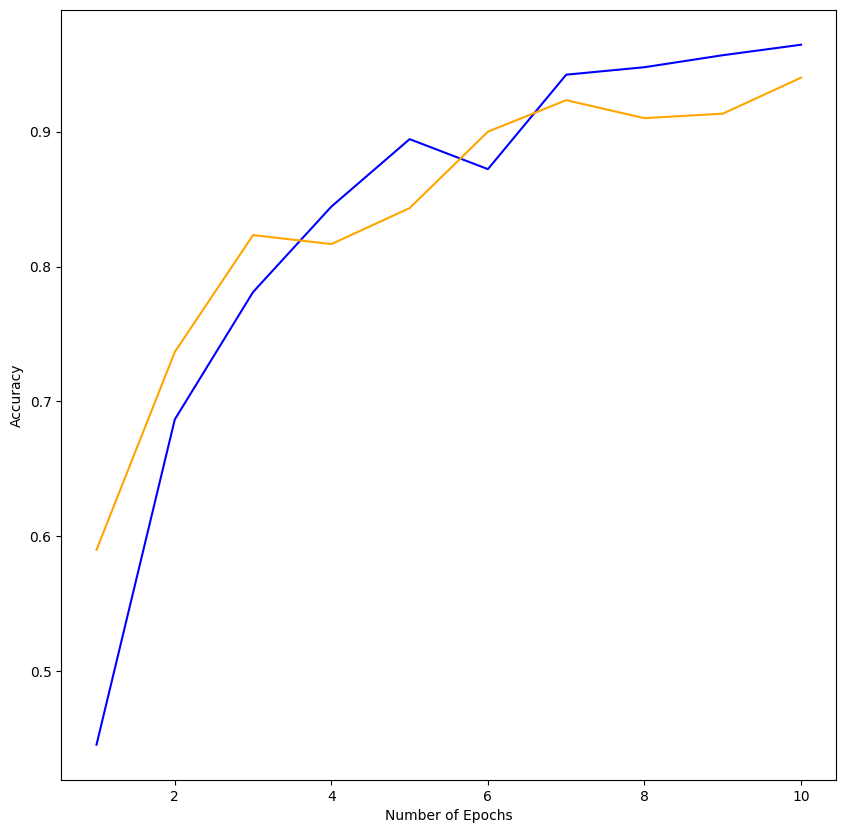

In [32]:
# Plot accuracy for training and validation for various epochs
epochs = [i for i in range(1, 11)]
plt.figure(figsize=(10, 10))
plt.plot(epochs, train_history.history['accuracy'], color='blue', label='Training Accuracy')
plt.plot(epochs, train_history.history['val_accuracy'], color='orange', label='Validation Accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.show()

In [33]:
# Save the model
cnn.save('potato_leaf_disease_detection_model.keras')